In [38]:
import cv2
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [3]:
img=cv2.imread("watch.jpg",cv2.IMREAD_GRAYSCALE)
cv2.imwrite('watchgray.png',img)

True

#### Opening image as gray color map

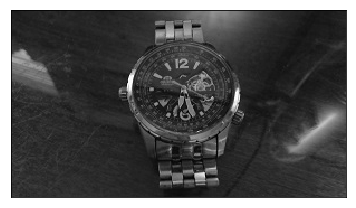

In [4]:
plt.imshow(img, cmap = 'gray')
plt.xticks([]), plt.yticks([]) 
plt.show()

#### Color Image

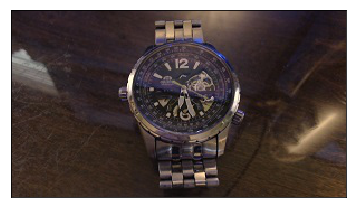

In [5]:
img_color = cv2.imread('watch.jpg',cv2.IMREAD_COLOR)
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
plt.imshow(img_color)
plt.xticks([]), plt.yticks([]) 
plt.show()

In [6]:
img_color.shape

(168, 300, 3)

#### Drawing on image

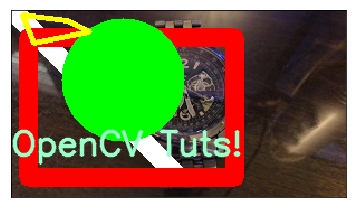

In [12]:
img = cv2.imread('watch.jpg',cv2.IMREAD_COLOR)
cv2.line(img,(0,0),(150,150),(255,255,255),15)
cv2.rectangle(img,(15,25),(200,150),(0,0,255),15)
cv2.circle(img,(100,63), 55, (0,255,0), -1)
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(img, [pts], True, (0,255,255), 3)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV Tuts!',(0,130), font, 1, (200,255,155), 2, cv2.LINE_AA)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.xticks([]), plt.yticks([]) 
plt.show()

#### Region of interest and editing pixel values.

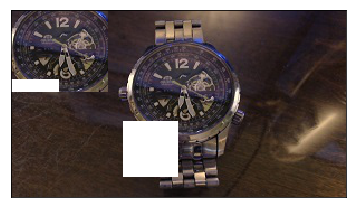

In [13]:
img = cv2.imread('watch.jpg',cv2.IMREAD_COLOR)
img[100:150,100:150] = [255,255,255]
watch_face = img[37:111,107:194]
img[0:74,0:87] = watch_face
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.xticks([]), plt.yticks([]) 
plt.show()

#### Thresholding

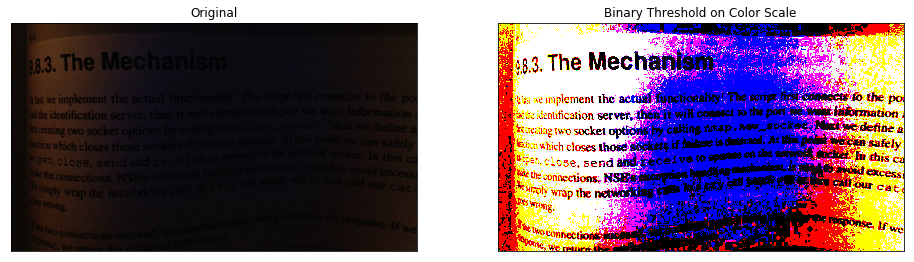

In [130]:
img = cv2.imread('bookpage.jpg')
retval, threshold = cv2.threshold(img, 12, 255, cv2.THRESH_BINARY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
threshold = cv2.cvtColor(threshold, cv2.COLOR_BGR2RGB)
plt.rcParams["figure.figsize"] = [16,9]
plt.subplot(1,2,1),plt.imshow(img), plt.title("Original")
plt.xticks([]), plt.yticks([]) 
plt.subplot(1,2,2),plt.imshow(threshold), plt.title("Binary Threshold on Color Scale")
plt.xticks([]), plt.yticks([]) 
plt.show()

#### Converting to grayscale

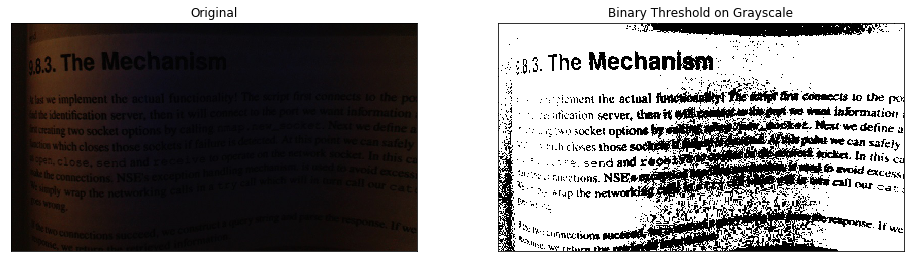

In [128]:
img = cv2.imread('bookpage.jpg')
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
retval, threshold = cv2.threshold(grayscaled, 10, 255, cv2.THRESH_BINARY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.rcParams["figure.figsize"] = [16,9]
plt.subplot(1,2,1),plt.imshow(img), plt.title("Original")
plt.xticks([]), plt.yticks([]) 
plt.subplot(1,2,2),plt.imshow(threshold,'gray'), plt.title("Binary Threshold on Grayscale")
plt.xticks([]), plt.yticks([]) 
plt.show()

#### Using adaptive threshold on grayscaled images

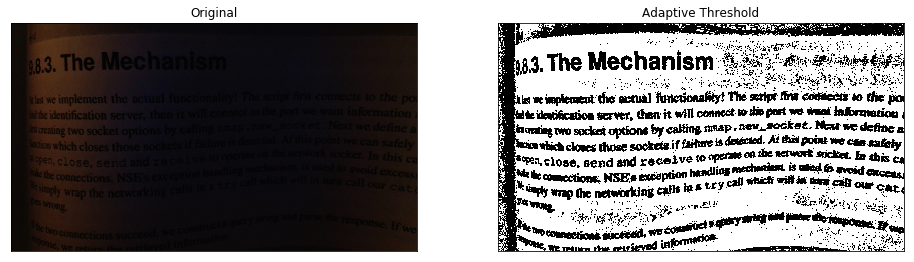

In [127]:
img = cv2.imread('bookpage.jpg')
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
th = cv2.adaptiveThreshold(grayscaled, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.rcParams["figure.figsize"] = [16,9]
plt.subplot(1,2,1),plt.imshow(img), plt.title("Original")
plt.xticks([]), plt.yticks([]) 
plt.subplot(1,2,2),plt.imshow(th,'gray'), plt.title("Adaptive Threshold")
plt.xticks([]), plt.yticks([]) 
plt.show()

#### Another variant, Otsu threshold

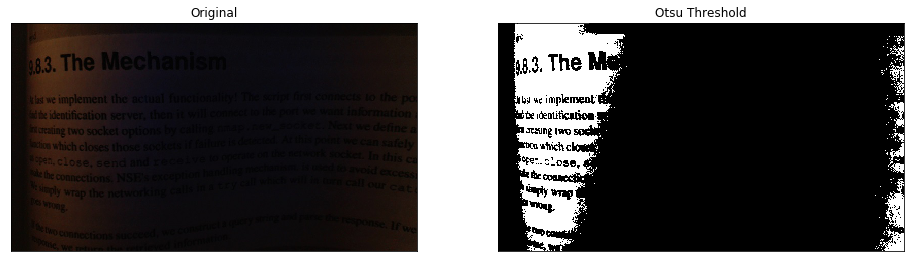

In [126]:
img = cv2.imread('bookpage.jpg')
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
retval2,threshold2 = cv2.threshold(grayscaled,125,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.rcParams["figure.figsize"] = [16,9]
plt.subplot(1,2,1),plt.imshow(img), plt.title("Original")
plt.xticks([]), plt.yticks([]) 
plt.subplot(1,2,2),plt.imshow(threshold2,'gray'), plt.title("Otsu Threshold")
plt.xticks([]), plt.yticks([]) 
plt.show()

#### Blurring and Masking

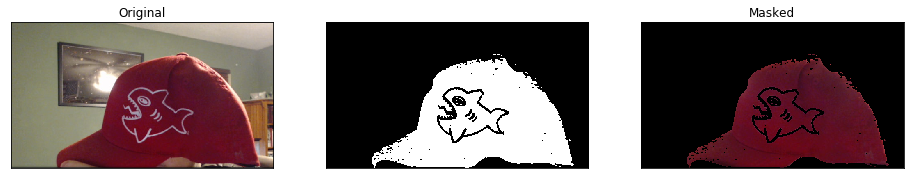

In [125]:
frame = cv2.imread('masking_blurring.jpg')
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

lower_red = np.array([30,150,50])
upper_red = np.array([255,255,180])

mask = cv2.inRange(hsv, lower_red, upper_red)
res = cv2.bitwise_and(frame,frame, mask= mask)

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

plt.rcParams["figure.figsize"] = [16,9]
plt.subplot(1,3,1),plt.imshow(frame), plt.title("Original")
plt.xticks([]), plt.yticks([]) 
plt.subplot(1,3,2),plt.imshow(mask,'gray')
plt.xticks([]), plt.yticks([]) 
plt.subplot(1,3,3),plt.imshow(res), plt.title("Masked")
plt.xticks([]), plt.yticks([]) 
plt.show()


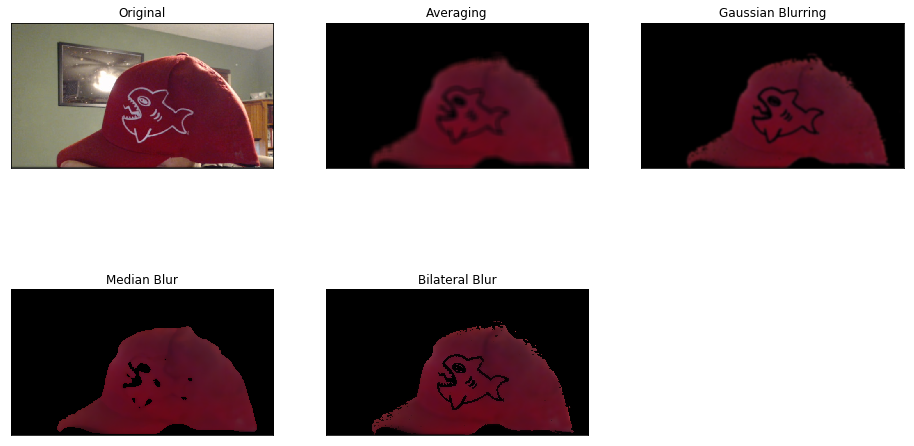

In [61]:
frame = cv2.imread('masking_blurring.jpg')
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

lower_red = np.array([30,150,50])
upper_red = np.array([255,255,180])

mask = cv2.inRange(hsv, lower_red, upper_red)
res = cv2.bitwise_and(frame,frame, mask= mask)

kernel = np.ones((15,15),np.float32)/225
smoothed = cv2.filter2D(res,-1,kernel)
blur = cv2.GaussianBlur(res,(15,15),0)
median = cv2.medianBlur(res,15)
bilateral = cv2.bilateralFilter(res,15,75,75)

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
smoothed = cv2.cvtColor(smoothed, cv2.COLOR_BGR2RGB)
blur = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)
median = cv2.cvtColor(median, cv2.COLOR_BGR2RGB)
bilateral = cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB)

plt.rcParams["figure.figsize"] = [16,9]
plt.subplot(2,3,1),plt.imshow(frame), plt.title("Original")
plt.xticks([]), plt.yticks([]) 
plt.subplot(2,3,2),plt.imshow(smoothed), plt.title("Averaging")
plt.xticks([]), plt.yticks([]) 
plt.subplot(2,3,3),plt.imshow(blur), plt.title("Gaussian Blurring")
plt.xticks([]), plt.yticks([])
plt.subplot(2,3,4),plt.imshow(median), plt.title("Median Blur")
plt.xticks([]), plt.yticks([]) 
plt.subplot(2,3,5),plt.imshow(bilateral), plt.title("Bilateral Blur")
plt.xticks([]), plt.yticks([]) 
plt.show()


#### Edge detection Laplacian and sobel

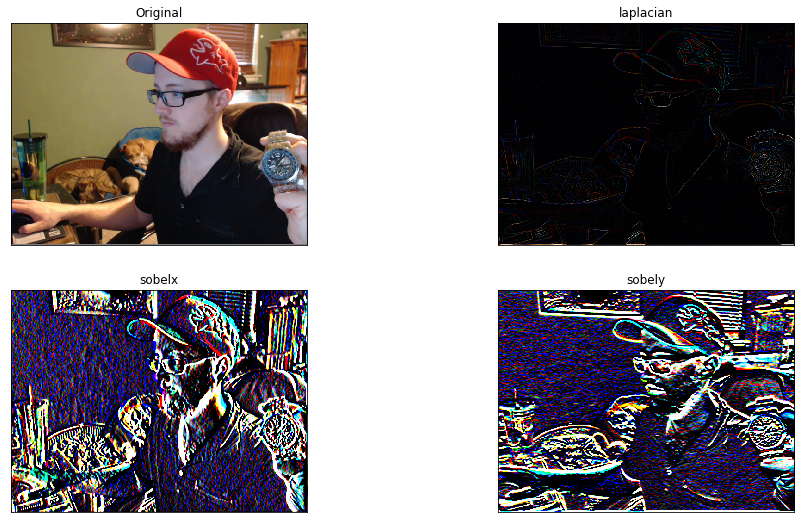

In [124]:
frame = cv2.imread('edge_detection.png')
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

lower_red = np.array([30,150,50])
upper_red = np.array([255,255,180])

mask = cv2.inRange(hsv, lower_red, upper_red)
res = cv2.bitwise_and(frame,frame, mask= mask)


laplacian = cv2.Laplacian(frame,cv2.CV_8U  )
sobelx = cv2.Sobel(frame,cv2.CV_8U  ,1,0,ksize=5)
sobely = cv2.Sobel(frame,cv2.CV_8U  ,0,1,ksize=5)

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
laplacian = cv2.cvtColor(laplacian, cv2.COLOR_BGR2RGB)
sobelx = cv2.cvtColor(sobelx, cv2.COLOR_BGR2RGB)
sobely = cv2.cvtColor(sobely, cv2.COLOR_BGR2RGB)

plt.rcParams["figure.figsize"] = [16,9]
plt.subplot(2,2,1),plt.imshow(frame), plt.title("Original")
plt.xticks([]), plt.yticks([]) 
plt.subplot(2,2,2),plt.imshow(laplacian), plt.title("laplacian")
plt.xticks([]), plt.yticks([]) 
plt.subplot(2,2,3),plt.imshow(sobelx), plt.title("sobelx")
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely), plt.title("sobely")
plt.xticks([]), plt.yticks([]) 

plt.show()

#### Canny edge detection

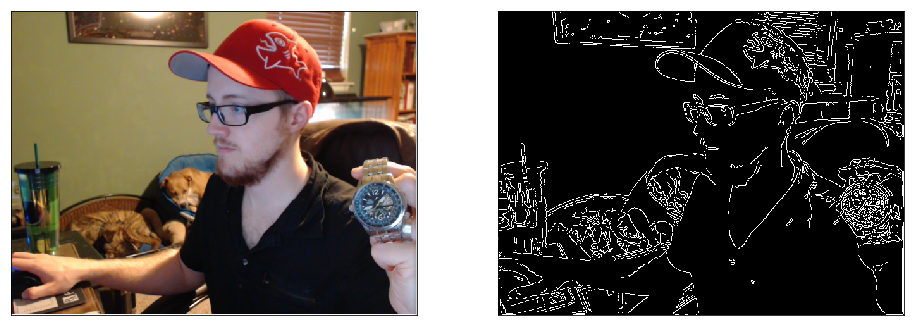

In [109]:
frame = cv2.imread('edge_detection.png')
edges = cv2.Canny(frame,100,200)

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.rcParams["figure.figsize"] = [16,9]
plt.subplot(1,2,1),plt.imshow(frame)
plt.xticks([]), plt.yticks([]) 
plt.subplot(1,2,2),plt.imshow(edges,'gray')
plt.xticks([]), plt.yticks([]) 
plt.show()

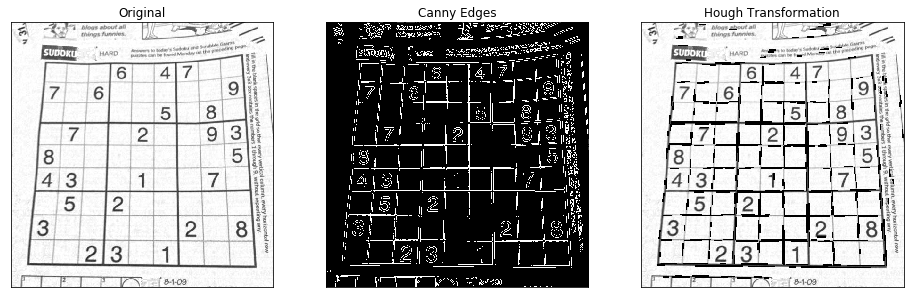

In [121]:
frame = cv2.imread('hough_transformation.png')
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
edges  = cv2.Canny(gray,100,200)

minLineLength = 30
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,15,minLineLength,maxLineGap)
for x in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[x]:
        cv2.line(gray,(x1,y1),(x2,y2),(0,255,0),2)
        
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

plt.rcParams["figure.figsize"] = [16,9]
plt.subplot(1,3,1),plt.imshow(frame), plt.title("Original") 
plt.xticks([]), plt.yticks([]) 
plt.subplot(1,3,2),plt.imshow(edges,'gray'), plt.title("Canny Edges")
plt.xticks([]), plt.yticks([]) 
plt.subplot(1,3,3),plt.imshow(gray,'gray'), plt.title("Hough Transformation")
plt.xticks([]), plt.yticks([]) 
plt.show()